<a href="https://colab.research.google.com/github/elliekim9881/AIFFEL_Quest/blob/master/MainQuest_03/MainQuest_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MainQuest_03. 가위바위보 분류기 만들기

 - 일반적인 딥러닝 기술의 제작 순서대로 제작한다.
  - **데이터준비 > 딥러닝 네트워크 설계 > 학습 > 테스트(평가)**

|데이터 디렉토리 ||
|--------------------------|------------|
|rock_scissor_paper|test|
|내부|
|rock|rock|
|scissor|scissor|
|paper|paper|
|test||

## 1. 데이터 준비


> ### 1.1 데이터 만들기
- 전면 카메라를 활용하여 가위, 바위, 보 이미지 각 100장, 300장의 데이터를 제작.
- teachable machine 사이트에서 데이터를 만들 수 있다.
- 캡쳐를 진행할 때,
  - 여러 각도에서 찍는다
  - 여러 크기로 찍는다
  - 혼자하면 다양한 각도와 크기를 저장할 수 없어 함께 하면 좋다
  - 좋은 데이터가 좋은 결과를 만든다.

In [1]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


- 수집한 가위바위보 이미지 resize 해준다.
- resize_images() : 해당 디렉토리 아래의 모든 jpg파일을 읽어서 사이즈 28x28로 변환

In [3]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/rock_scsisor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


<ipython-input-3-0769fd6741e1>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/rock_scsisor_paper/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print(" resize 완료")

100  images to be resized.


<ipython-input-3-0769fd6741e1>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


100  images resized.
 resize 완료


In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/rock_scsisor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


<ipython-input-3-0769fd6741e1>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


- 가위, 바위, 보의 이미지 사이즈를 일괄적으로 28x28로 바꾸어주었다.

### 1.2 이미지 라벨링
- 사이즈 변환한 이미지들을 로드하고 라벨링해준다.
- load_data() : 폴더의 위치를 받아서 가위,바위,보 데이터를 읽어들이고 총 3개의 클래스로 라벨링.
  - 가위 : 0
  - 바위 : 1
  - 보 : 2
- 입력은 0~1 사이의 값으로 정규화시켜준다.

In [6]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/rock_scsisor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


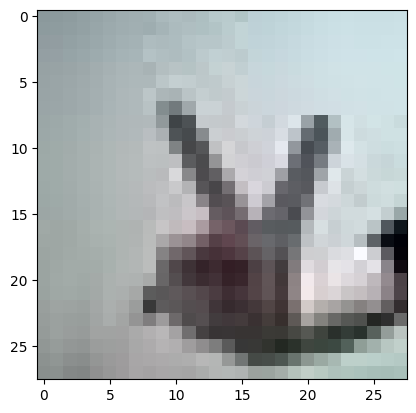

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

- 라벨 0에서 가위 사진이 출력되었다.
- 라벨이 잘 적용되었음을 확인할 수 있다.

## 2. 네트워크 설계
- 가위, 바위, 보 파일은 컬러이기때문에 손글씨 데이터와 다르게 채널은 3으로 수정.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

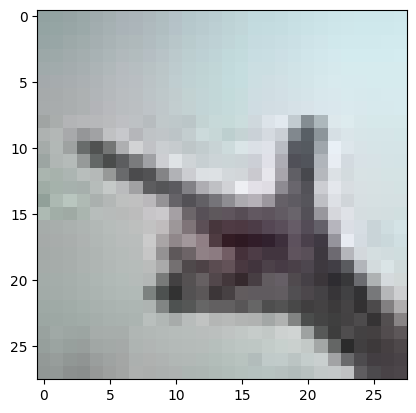

51 번째 이미지는 0 입니다.


In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=32
n_channel_2=64
n_dense=128
n_train_epoch=10

model=keras.models.Sequential()

model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])


index=50
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지는',  y_train[index], '입니다.')


## 3. 학습
- 설계 완료된 네트워크를 학습시켜준다.
- optimaizer는 adam

In [17]:
# 모델 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 31ms/step - loss: 44.8922 - accuracy: 0.3267
Epoch 2/10
10/10 [==============================] - 0s 33ms/step - loss: 3.6858 - accuracy: 0.5633
Epoch 3/10
10/10 [==============================] - 0s 33ms/step - loss: 2.0549 - accuracy: 0.7033
Epoch 4/10
10/10 [==============================] - 0s 32ms/step - loss: 0.6889 - accuracy: 0.8433
Epoch 5/10
10/10 [==============================] - 0s 33ms/step - loss: 0.3201 - accuracy: 0.9300
Epoch 6/10
10/10 [==============================] - 0s 31ms/step - loss: 0.1035 - accuracy: 0.9700
Epoch 7/10
10/10 [==============================] - 0s 32ms/step - loss: 0.0793 - accuracy: 0.9900
Epoch 8/10
10/10 [==============================] - 0s 32ms/step - loss: 0.0668 - accuracy: 0.9733
Epoch 9/10
10/10 [==============================] - 0s 31ms/step - loss: 0.0128 - accuracy: 0.9933
Epoch 10/10
10/10 [==============================] - 0s 33ms/step - loss: 0.0125 - accuracy: 0.9900


## 4. 테스트
- 테스트를 위해 테스트 데이터를 받아서 테스트를 진행한다.
- x_test, y_test를 만들어주고 입력 데이터와 동일하게 사이즈를 조정해준다.

In [13]:
 #샘플 가위 이미지 사이즈 변경(28x28)
image_dir_path = "/content/rock_scsisor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 샘플 이미지 resize 완료!")

 #샘플 보 이미지 사이즈 변경(28x28)
image_dir_path = "/content/rock_scsisor_paper/test/paper"
resize_images(image_dir_path)

print("보 샘플 이미지 resize 완료!")

 #샘플 바위 이미지 사이즈 변경(28x28)
image_dir_path = "/content/rock_scsisor_paper/test/rock"
resize_images(image_dir_path)

print("바위 샘플 이미지 resize 완료!")

 #가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수로 데이터 불러오기
image_dir_path = "/content/rock_scsisor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 301) #x_test,y_test만들기
x_test_norm = x_test/255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
가위 샘플 이미지 resize 완료!
100  images to be resized.


<ipython-input-3-0769fd6741e1>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


100  images resized.
보 샘플 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 샘플 이미지 resize 완료!
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (301, 28, 28, 3)
y_test shape: (301,)


- 훈련시킨 모델을 사용하여 test_accuracy 측정.

In [18]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

10/10 - 0s - loss: 2.1293 - accuracy: 0.3920 - 241ms/epoch - 24ms/step
test_loss : 2.129324436187744
test_accuracy : 0.3920265734195709


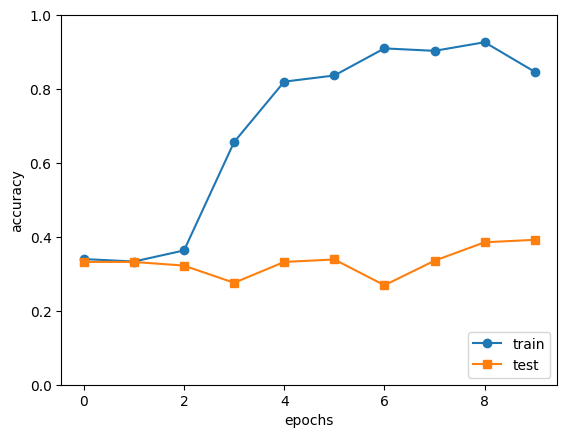

In [19]:
train_accuracy = []
test_accuracy = []

for epoch in range(n_train_epoch):
    # 모델을 한 에폭동안 훈련
    model.fit(x_train_norm, y_train, epochs=1, verbose=0)

    # 훈련 데이터와 테스트 데이터에 대해 모델을 평가하여 정확도 저장
    train_loss, train_acc = model.evaluate(x_train_norm, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(x_test_norm, y_test, verbose=0)

    # 정확도 값을 리스트에 추가
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

# 훈련 및 테스트 데이터에 대한 정확도를 에폭별로 시각화
markers = {'train': 'o', 'test': 's'}
x = np.arange(n_train_epoch)

plt.plot(x, train_accuracy, marker='o', label='train', markevery=1)
plt.plot(x, test_accuracy, marker='s', label='test', markevery=1)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

- 에포크당 train, test accuracy를 시각화하였다.
- overfitting이 발생하였음을 확인해볼 수 있다.
- train data의 규모 자체가 작아서 발생한 overfit으로 추정.

- 모델이 틀린 경우를 찾아본다
- 랜덤하게 10개씩 볼 수 있게 작성.

10/10 [==============================] - 0s 9ms/step
예측확률분포: [7.1252443e-02 5.8415433e-05 9.2868918e-01 4.5247001e-11 1.0025938e-09
 2.2161772e-10 5.5579017e-11 2.5908959e-09 9.6028636e-11 1.7054427e-10]
라벨: 0, 예측결과: 2


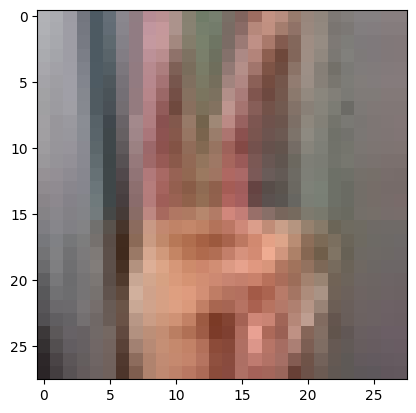

예측확률분포: [4.7739851e-01 3.7591002e-04 5.2222550e-01 1.9707180e-09 4.8490705e-08
 7.8245774e-09 9.5983765e-10 3.8007908e-08 3.7970715e-09 6.4991377e-09]
라벨: 0, 예측결과: 2


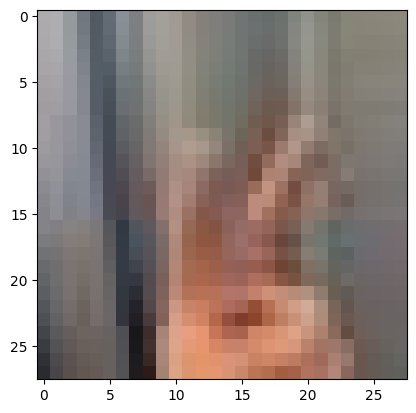

예측확률분포: [6.7978859e-01 5.0900388e-04 3.1970245e-01 6.4445438e-10 2.3957462e-08
 2.6106253e-09 2.3293711e-10 1.3984343e-08 9.7241326e-10 2.2004978e-09]
라벨: 1, 예측결과: 0


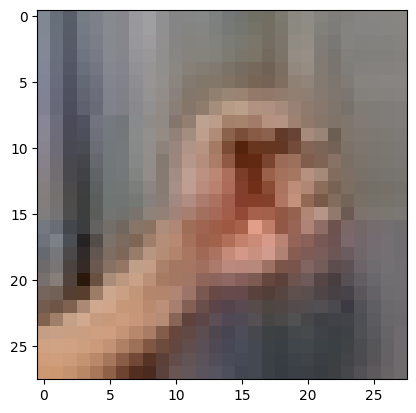

예측확률분포: [1.9091083e-03 8.8966704e-07 9.9809003e-01 4.0911624e-13 3.0380937e-11
 2.4969037e-12 1.2867332e-12 1.3056473e-10 9.7653838e-12 2.4087902e-12]
라벨: 1, 예측결과: 2


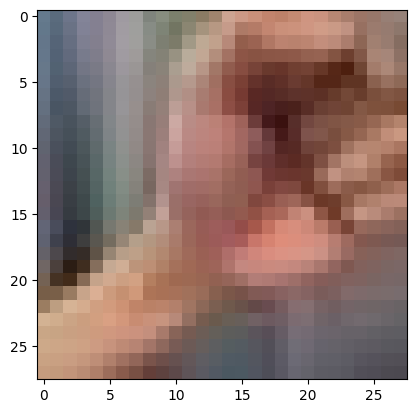

예측확률분포: [8.2468197e-02 2.7903325e-05 9.1750383e-01 2.4612149e-11 9.5712527e-10
 1.3657095e-10 3.2209464e-11 1.9543576e-09 1.3748989e-10 1.2394812e-10]
라벨: 0, 예측결과: 2


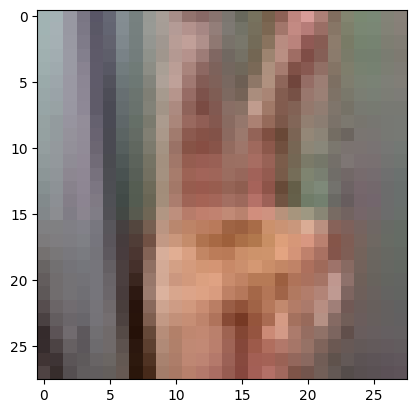

예측확률분포: [7.1252443e-02 5.8415433e-05 9.2868918e-01 4.5247001e-11 1.0025938e-09
 2.2161772e-10 5.5579017e-11 2.5908959e-09 9.6028636e-11 1.7054427e-10]
라벨: 0, 예측결과: 2


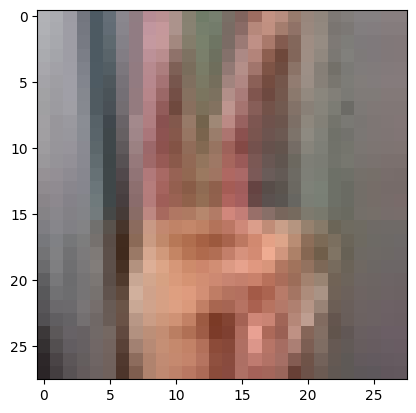

예측확률분포: [9.9377233e-01 2.1692662e-07 6.2274495e-03 2.5207591e-11 3.0466202e-10
 5.6610407e-11 1.2198386e-11 1.7839956e-10 1.1379041e-11 2.4213823e-10]
라벨: 2, 예측결과: 0


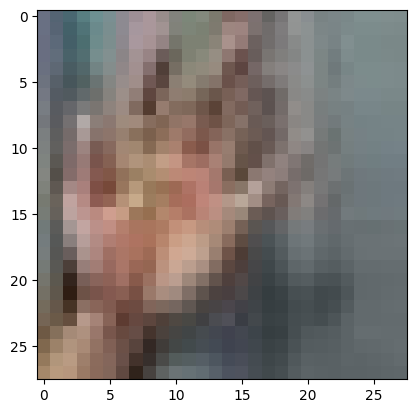

예측확률분포: [8.4919125e-01 1.6064136e-04 1.5064812e-01 4.7668364e-10 1.3627824e-08
 1.6168902e-09 1.8566494e-10 7.6967179e-09 5.4112465e-10 2.0839397e-09]
라벨: 1, 예측결과: 0


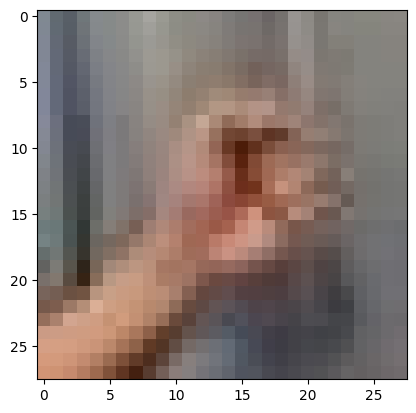

예측확률분포: [8.1812359e-02 1.7985069e-04 9.1800779e-01 1.2745090e-10 3.7428998e-09
 5.4118587e-10 9.7549219e-11 5.4467386e-09 3.6347361e-10 3.4315067e-10]
라벨: 0, 예측결과: 2


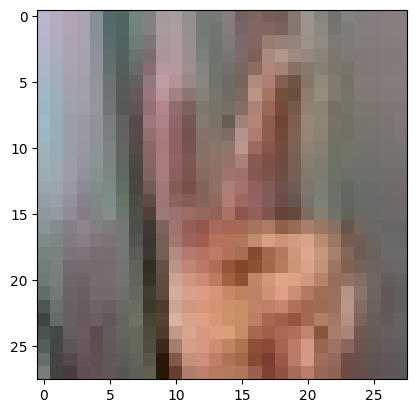

예측확률분포: [9.5837736e-01 1.3879337e-03 4.0234528e-02 1.5615264e-09 2.8858382e-08
 5.9006302e-09 3.1758360e-10 8.3502858e-09 4.5135834e-10 3.0329494e-09]
라벨: 1, 예측결과: 0


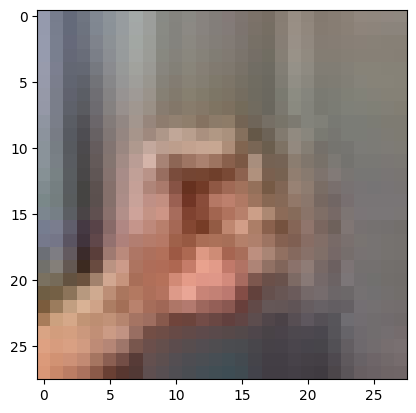

In [24]:
import random
predicted_result = model.predict(x_test_norm)	# model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1)
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

samples = random.choices(population=wrong_predict_list, k=10) # k값을 수정하면 더 많은 값의 수를 볼 수 있다.

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

10/10 [==============================] - 0s 15ms/step
예측확률분포: [0.08747903 0.1316447  0.10862602 0.09939549 0.09218163 0.10363821
 0.09053851 0.09765121 0.08721932 0.10162581]
라벨: 0, 예측결과: 1


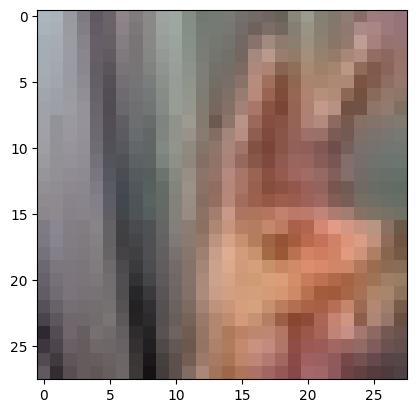

예측확률분포: [0.08533547 0.12983713 0.1130209  0.10219858 0.09128956 0.09597109
 0.09080422 0.10269928 0.08586169 0.10298196]
라벨: 2, 예측결과: 1


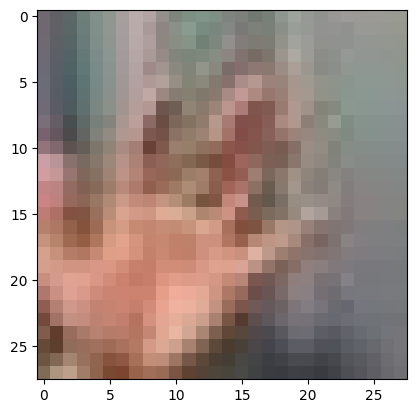

예측확률분포: [0.08839123 0.13362548 0.10722923 0.10148547 0.09507555 0.09905025
 0.08824797 0.09840671 0.08587606 0.10261199]
라벨: 0, 예측결과: 1


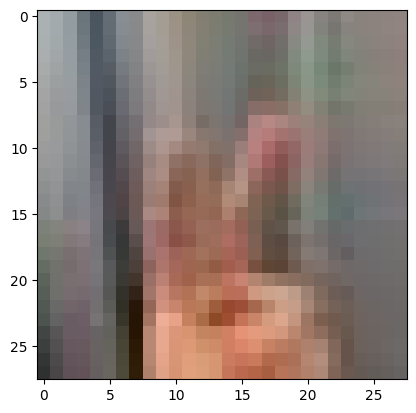

예측확률분포: [0.0866634  0.13799703 0.10900705 0.09681614 0.09409511 0.10030458
 0.08900605 0.09654032 0.08665851 0.10291173]
라벨: 0, 예측결과: 1


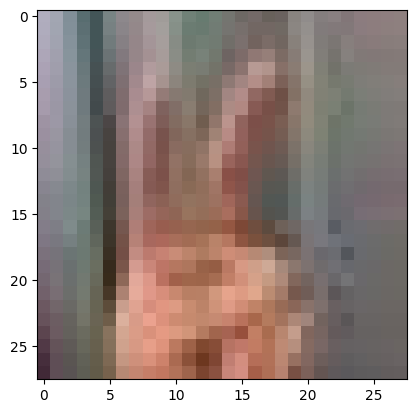

예측확률분포: [0.08644972 0.13487454 0.10969829 0.10009731 0.09488747 0.0981731
 0.08929449 0.0979337  0.08773738 0.10085389]
라벨: 0, 예측결과: 1


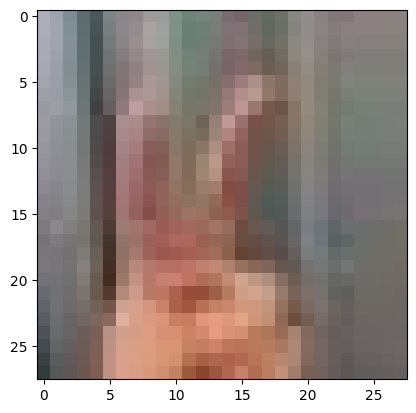

예측확률분포: [0.08462583 0.13346475 0.11393879 0.09875076 0.09235857 0.09842208
 0.09004668 0.10108696 0.08424344 0.10306206]
라벨: 2, 예측결과: 1


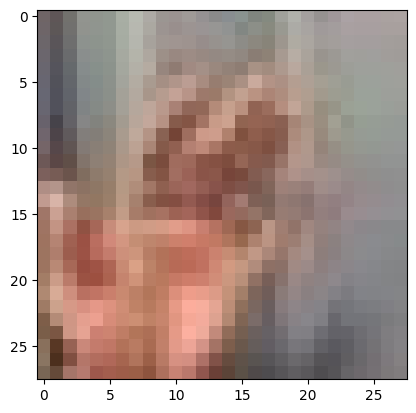

예측확률분포: [0.08500505 0.12988676 0.11421749 0.10338041 0.09058247 0.09559112
 0.09014009 0.10155952 0.08603868 0.10359835]
라벨: 2, 예측결과: 1


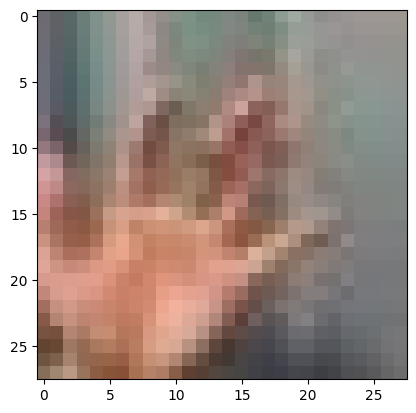

예측확률분포: [0.08259714 0.13230234 0.11502589 0.10124497 0.09385077 0.0980387
 0.08816668 0.0999571  0.08720017 0.1016162 ]
라벨: 2, 예측결과: 1


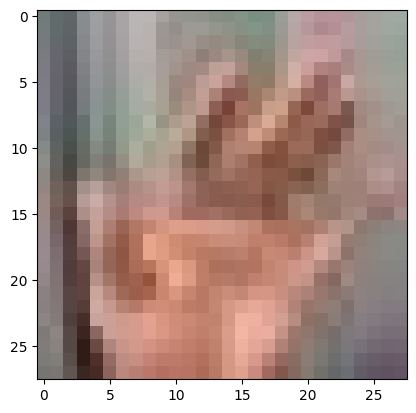

예측확률분포: [0.09047752 0.13129301 0.10694013 0.10783427 0.09060455 0.09547273
 0.0874362  0.09902395 0.08671129 0.10420632]
라벨: 2, 예측결과: 1


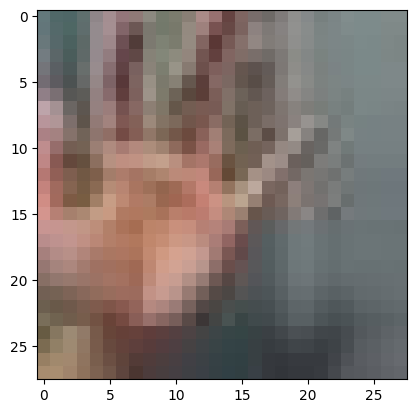

예측확률분포: [0.08677541 0.12757991 0.10747733 0.10199858 0.09255011 0.09949522
 0.09099808 0.10051076 0.08738844 0.10522611]
라벨: 2, 예측결과: 1


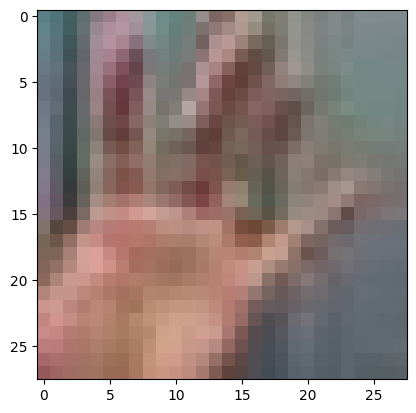

In [26]:
import random
predicted_result = model.predict(x_test_norm)	# model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1)
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

samples = random.choices(population=wrong_predict_list, k=10) # k값을 수정하면 더 많은 값의 수를 볼 수 있다.

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

- 올바르지 않은 결과들의 특징을 살펴보면 다음과 같은 특징들이 존재했다.
- 해당 결과들이 나온 이유에 대하여 생각해본다.
  - 가위에서 주먹을쥐는 부분을 주먹으로 인식하여 주먹으로 분류한 경우
  - 주먹이 크게 표시된 사진에서 보자기로 인식하여 보자기로 분류한 경우
  - 보자기가 크게 나온 이미지를 주먹으로 분류한 경우
- 성능 향상을 위하여 다음과 같은 조건들을 고려해볼 수 있었다.
  - train으로 넣은 주먹의 크기가 작다. 주먹이 크게 나온 이미지를 추가한다.
  - train set에 필자의 손만 들어갔기 때문에 손의 크기가 다소 작고 test set의 크기는 비교적 크다. 다양한 손 크기의 train data를 추가한다.
  - 이미지의 화질을 높여서 학습시킨다. 주먹과 보자기의 특징이 다소 구분하기 어려워 보인다.
  - train data의 규모 자체가 작다.(300개, 각각의 데이터는 100개이므로) 더 많은 train data를 추가한다.


In [ ]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/rock_scsisor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/rock_scsisor_paper/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print(" resize 완료")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/rock_scsisor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

image_dir_path = "/content/rock_scsisor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

In [ ]:
 #샘플 가위 이미지 사이즈 변경(28x28)
image_dir_path = "/content/rock_scsisor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 샘플 이미지 resize 완료!")

 #샘플 보 이미지 사이즈 변경(28x28)
image_dir_path = "/content/rock_scsisor_paper/test/paper"
resize_images(image_dir_path)

print("보 샘플 이미지 resize 완료!")

 #샘플 바위 이미지 사이즈 변경(28x28)
image_dir_path = "/content/rock_scsisor_paper/test/rock"
resize_images(image_dir_path)

print("바위 샘플 이미지 resize 완료!")

 #가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수로 데이터 불러오기
image_dir_path = "/content/rock_scsisor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 301) #x_test,y_test만들기
x_test_norm = x_test/255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

## 5. 회고

- train 이미지의 개수가 많아야 좋은 결과를 얻을 수 있다.
  - 개수가 적다면 overfit이 발생한다.
- train data를 resize 해 주었다면 test data또한 동일하게 resize해주어야한다.
- test데이터와 train데이터가 저장된 디렉토리를 명확히 정리해놓은 뒤 데이터 처리를 진행해야한다. (경로가 올바르게 설정되어야함)

## 6. 참고자료

- chatGPT : 훈련 및 테스트 데이터에 대한 정확도를 에폭별로 시각화
- 데이터 제작 : https://teachablemachine.withgoogle.com/
- Dense 클래스 참고 : https://sevillabk.github.io/Dense/